In [186]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

start = time.perf_counter()

In [187]:
df = pd.read_csv('earl694412-infinite-matchhistory.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               788 non-null    object 
 1   SeasonNumber       788 non-null    int64  
 2   SeasonVersion      788 non-null    int64  
 3   Player             788 non-null    object 
 4   MatchId            788 non-null    object 
 5   Map                788 non-null    object 
 6   Category           788 non-null    object 
 7   Playlist           788 non-null    object 
 8   Input              788 non-null    object 
 9   Queue              788 non-null    object 
 10  PreCsr             788 non-null    int64  
 11  PostCsr            788 non-null    int64  
 12  Rank               788 non-null    int64  
 13  WasAtStart         788 non-null    int64  
 14  WasAtEnd           788 non-null    int64  
 15  WasInProgressJoin  788 non-null    int64  
 16  Mmr                2 non-n

In [188]:
df['Date'] = pd.to_datetime(df['Date'])
df['LengthMinutes'] = df['LengthSeconds'] / 60
df.rename(columns={'TotalKills': 'Kills'}, inplace=True)
df['KillsBody'] = df['Kills'] - df['KillsGrenade'] - df['KillsHeadshot'] - df['KillsMelee'] - df['KillsPower']
df['DamageRatio'] = df['DamageDone'] / df['DamageTaken']
df['Damage/Kill'] = df['DamageDone'] / df['Kills']
# Per 10 Min
df['Kills/10Min'] = (df['Kills'] / df['LengthMinutes']) * 10
df['Deaths/10Min'] = (df['Deaths'] / df['LengthMinutes']) * 10
df['Assists/10Min'] = (df['Assists'] / df['LengthMinutes']) * 10
df['Dmg/10Min'] = (df['DamageDone'] / df['LengthMinutes']) * 10
df['DmgT/10Min'] = (df['DamageTaken'] / df['LengthMinutes']) * 10
df['Shots/10Min'] = (df['ShotsFired'] / df['LengthMinutes']) * 10
# Excess
df['ExcessKills'] = df['Kills'] - df['ExpectedKills']
df['ExcessDeaths'] = df['ExpectedDeaths'] - df['Deaths']
# Kill Type
df['BodyPct'] = df['KillsBody'] / df['Kills'] *100
df['MeleePct'] = df['KillsMelee'] / df['Kills'] * 100
df['HSPct'] = df['KillsHeadshot'] / df['Kills'] * 100
df['GrenadePct'] = df['KillsGrenade'] / df['Kills'] * 100
df['PowerPct'] = df['KillsPower'] / df['Kills'] * 100



df = df.drop(['Player', 'MatchId', 'Input', 'Queue', 'Mmr', 'PreCsr', 'PostCsr', 'ShotsFired', 'AssistsEmp',
              'ShotsMissed', 'ShotsLanded', 'Betrayals', 'Suicides', 'WasAtStart', 'WasAtEnd', 'AssistsDriver',
              'Perfects', 'WasInProgressJoin', 'VehicleDestroys', 'VehicleHijacks', 'AssistsCallout',
              'LengthSeconds', 'Rank', 'SeasonNumber', 'SeasonVersion', 'Map'],axis=1)
df = df.drop(['KillsBody','KillsMelee', 'KillsGrenade', 'KillsHeadshot', 'KillsPower'], axis=1)
dfR = df[df['Playlist'] == 'Ranked Arena']
dfRR = dfR[dfR['Date']> '2023-01-01']
dfRR = dfRR[dfRR['Outcome'] != 'Draw']
dfRR = dfRR[dfRR['Outcome'] != 'Left']
dfRR['Outcome'] = dfRR['Outcome'].map({'Win': 1, 'Loss': 0})
dfRR = dfRR.drop(['Date', 'Category', 'Playlist'], axis=1)
dfRR = dfRR.dropna()
dfRR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 140 to 787
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Outcome         540 non-null    int64  
 1   Accuracy        540 non-null    float64
 2   DamageDone      540 non-null    int64  
 3   DamageTaken     540 non-null    int64  
 4   KD              540 non-null    float64
 5   KDA             540 non-null    float64
 6   Kills           540 non-null    int64  
 7   Deaths          540 non-null    int64  
 8   Assists         540 non-null    int64  
 9   MaxSpree        540 non-null    int64  
 10  ExpectedKills   540 non-null    float64
 11  ExpectedDeaths  540 non-null    float64
 12  Score           540 non-null    int64  
 13  Medals          540 non-null    int64  
 14  LengthMinutes   540 non-null    float64
 15  DamageRatio     540 non-null    float64
 16  Damage/Kill     540 non-null    float64
 17  Kills/10Min     540 non-null    f

In [189]:
def cnt(df, col):
    count = df[col].count()
    return count
def sm(df, col):
    sum = df[col].sum()
    return sum
def avg(df, col, val=None):
    avg = round(sm(df, col) / cnt(df, col),val)
    return avg


In [190]:
corr_mtrx = dfRR.corr().abs()
print(corr_mtrx['Outcome'].sort_values(ascending=False))

Outcome           1.000000
Deaths/10Min      0.438164
DmgT/10Min        0.355452
KD                0.317824
Deaths            0.316322
KDA               0.282209
ExcessDeaths      0.260143
DamageTaken       0.243712
ExpectedDeaths    0.204198
Damage/Kill       0.192144
Assists/10Min     0.164373
Kills/10Min       0.153257
LengthMinutes     0.130760
MaxSpree          0.128737
DamageRatio       0.123914
DamageDone        0.088358
Accuracy          0.077647
Assists           0.044595
Score             0.042132
Dmg/10Min         0.038335
BodyPct           0.030722
Medals            0.029185
ExpectedKills     0.028616
Shots/10Min       0.021268
HSPct             0.020275
MeleePct          0.012839
Kills             0.012470
ExcessKills       0.012014
GrenadePct        0.004169
PowerPct          0.003024
Name: Outcome, dtype: float64


In [191]:
# dfRR.hist(bins=15, figsize=(16, 12))
# plt.tight_layout()
# plt.show()

In [192]:
dfRR.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Outcome,540.0,0.538889,0.498948,0.000000,0.000000,1.000000,1.000000,1.000000
Accuracy,540.0,51.491148,5.048217,36.800000,48.397500,51.515000,54.452500,80.560000
DamageDone,540.0,5230.637037,1819.529404,667.000000,3879.750000,4980.000000,6437.250000,12673.000000
DamageTaken,540.0,4438.190741,1512.726959,35.000000,3453.500000,4257.000000,5403.500000,9962.000000
KD,540.0,1.282500,0.767755,0.270000,0.860000,1.130000,1.460000,10.000000
KDA,540.0,4.651722,5.611147,-9.660000,0.660000,4.660000,8.000000,31.000000
Kills,540.0,14.650000,6.306761,1.000000,10.000000,14.000000,18.000000,40.000000
Deaths,540.0,12.792593,5.062278,0.000000,10.000000,12.000000,16.000000,32.000000
Assists,540.0,8.388889,4.155229,1.000000,6.000000,8.000000,10.250000,28.000000
MaxSpree,540.0,3.983333,1.584275,1.000000,3.000000,4.000000,5.000000,10.000000


In [193]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [194]:
# Define features (X) and target variable (y)
X = dfRR.drop('Outcome', axis=1) 
X = round(X,20)
y = dfRR['Outcome'] 

print(f'X Shape: {X.shape}')
print(f'Y Shape: {y.shape}')

X Shape: (540, 29)
Y Shape: (540,)


In [195]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=69)
print(f'X Train Shape: {X_train.shape}')
print(f'X Test Shape: {X_test.shape}')
print(X_train.columns)
print(X_test.info())



X Train Shape: (432, 29)
X Test Shape: (108, 29)
Index(['Accuracy', 'DamageDone', 'DamageTaken', 'KD', 'KDA', 'Kills', 'Deaths',
       'Assists', 'MaxSpree', 'ExpectedKills', 'ExpectedDeaths', 'Score',
       'Medals', 'LengthMinutes', 'DamageRatio', 'Damage/Kill', 'Kills/10Min',
       'Deaths/10Min', 'Assists/10Min', 'Dmg/10Min', 'DmgT/10Min',
       'Shots/10Min', 'ExcessKills', 'ExcessDeaths', 'BodyPct', 'MeleePct',
       'HSPct', 'GrenadePct', 'PowerPct'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 784 to 679
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Accuracy        108 non-null    float64
 1   DamageDone      108 non-null    int64  
 2   DamageTaken     108 non-null    int64  
 3   KD              108 non-null    float64
 4   KDA             108 non-null    float64
 5   Kills           108 non-null    int64  
 6   Deaths          108 non-null    int64 

In [196]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Accuracy', 'DamageDone', 'DamageTaken', 'KD', 'KDA', 'Kills',
                                    'Deaths', 'Assists', 'MaxSpree', 'ExpectedKills', 'ExpectedDeaths',
                                    'Score', 'Medals', 'LengthMinutes', 'DamageRatio', 'Damage/Kill',
                                    'Kills/10Min', 'Deaths/10Min', 'Assists/10Min', 'Dmg/10Min',
                                    'DmgT/10Min', 'Shots/10Min', 'ExcessKills', 'ExcessDeaths',
                                    'BodyPct', 'MeleePct', 'HSPct', 'GrenadePct', 'PowerPct'])])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# X_train_preprocessed.to_csv('X_train_preprocessed.csv')
# X_test_preprocessed.to_csv('X_test_preprocessed.csv')

print(f'X Train Processed Shape: {X_train_preprocessed.shape}')
print(f'X Train Shape: {X_train.shape}')
print(f'X Test Processed Shape: {X_test_preprocessed.shape}')

X Train Processed Shape: (432, 29)
X Train Shape: (432, 29)
X Test Processed Shape: (108, 29)


In [197]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, log_loss, classification_report, confusion_matrix
MSE_Histmean = mean_squared_error(y_test,np.full(y_test.shape,np.mean(y_train)))

def ResultsOut(model):
  y_pred = model.predict(X_test_preprocessed)
  # Calculate regression metrics
  acc = model.score(X_test_preprocessed, y_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r2 = r2_score(y_test, y_pred)
  oosr2 = 1-mean_squared_error(y_test,y_pred)/MSE_Histmean
  ll = log_loss(y_test,y_pred)
  clRep = classification_report(y_test, y_pred)
  confM = confusion_matrix(y_test, y_pred)

  # Print the metrics with newline characters
  print("Acc: {:.3f}".format(acc))
  print("MAE: {:.2f}".format(mae))
  print("MSE: {:.2f}".format(mse))
  print("RMSE: {:.2f}".format(rmse))
  print("R^2 Score: {:.2f}".format(r2))
  print("OOS R^2 Score: {:.2f}".format(oosr2))
  print("Log Loss: {:.2f}".format(ll))
  print('---------------------------------------------------------')
  print(clRep)
  print('---------------------------------------------------------') 
  # print(confM)
  # print('---------------------------------------------------------') 
  return ''

def paramResults(mod):
    results_df = pd.DataFrame({'param': mod.cv_results_["params"], 'Accuracy': mod.cv_results_["mean_test_score"]})

    # Splitting the 'param' column into separate columns
    params_df = pd.DataFrame(results_df['param'].to_list())
    params_df.columns = [f"{col}_param" for col in params_df.columns]

    # Concatenating the new columns with the 'Accuracy' column
    results_df = pd.concat([params_df, results_df['Accuracy']], axis=1)

    # Displaying the updated DataFrame
    print(results_df)
    return ''

def featImport(mod):
    feat_importances = pd.DataFrame(mod.best_estimator_.feature_importances_[:29], index=X_train.columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    feat_importances.plot(kind='bar', figsize=(8,6))
    plt.show()

def coefs(mod):
  # Get the coefficients
  coefficients = mod.coef_[0]

  # Create a dictionary with feature names and their corresponding coefficients
  feature_coefficients = dict(zip(X_train.columns, coefficients))

  # Sort features by coefficients in descending order
  sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

  # Print or analyze the top 5 sorted feature coefficients
  print("Top 5 Sorted Feature Coefficients:")
  for feature, coefficient in sorted_features[:5]:
      print(f"{feature}: {coefficient:.2f}")


## Logistic Regression

In [198]:
# Unregularized Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(penalty=None)
logreg.fit(X_train_preprocessed, y_train)

print(f'Unregularized Logistic Regression Accuracy: {logreg.score(X_test_preprocessed, y_test)}')
print(ResultsOut(logreg))
print(coefs(logreg))

Unregularized Logistic Regression Accuracy: 0.7962962962962963
Acc: 0.796
MAE: 0.20
MSE: 0.20
RMSE: 0.45
R^2 Score: 0.18
OOS R^2 Score: 0.18
Log Loss: 7.34
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        50
           1       0.85      0.76      0.80        58

    accuracy                           0.80       108
   macro avg       0.80      0.80      0.80       108
weighted avg       0.80      0.80      0.80       108

---------------------------------------------------------

Top 5 Sorted Feature Coefficients:
DamageTaken: -5.98
Deaths/10Min: -5.13
DamageDone: 4.79
Kills/10Min: 3.74
ExcessDeaths: -2.63
None


## Ridge

In [199]:
# Ridge
# Need to find best params for param grid

C_grid = [10**-3,10**-2,10**-1,10**0,10**1,10**2]

param_grid={'C':C_grid}
ridge_cv = GridSearchCV(LogisticRegression(penalty='l2',solver='saga'),
                                          param_grid=param_grid,cv=5)
ridge_cv.fit(X_train_preprocessed,y_train)

print(ridge_cv.best_estimator_)
print(f'Ridge Accuracy: {ridge_cv.score(X_test_preprocessed, y_test)}')
print(paramResults(ridge_cv))
print(ResultsOut(ridge_cv))
print(coefs(ridge_cv.best_estimator_))


LogisticRegression(C=10, solver='saga')
Ridge Accuracy: 0.8148148148148148
   C_param  Accuracy
0    0.001  0.645950
1    0.010  0.710799
2    0.100  0.773242
3    1.000  0.780246
4   10.000  0.782518
5  100.000  0.782518

Acc: 0.815
MAE: 0.19
MSE: 0.19
RMSE: 0.43
R^2 Score: 0.26
OOS R^2 Score: 0.26
Log Loss: 6.67
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        50
           1       0.87      0.78      0.82        58

    accuracy                           0.81       108
   macro avg       0.82      0.82      0.81       108
weighted avg       0.82      0.81      0.82       108

---------------------------------------------------------

Top 5 Sorted Feature Coefficients:
ExcessKills: -1.99
Deaths/10Min: -1.95
ExpectedKills: 1.93
ExcessDeaths: -1.61
ExpectedDeaths: -1.50
None


## Lasso

In [200]:
# Lasso

param_grid={'C':C_grid}
lasso_cv = GridSearchCV(LogisticRegression(penalty='l1',solver='saga'),
                                          param_grid=param_grid,cv=5)
lasso_cv.fit(X_train_preprocessed,y_train)

print(lasso_cv.best_estimator_)
print(f'Lasso Accuracy: {lasso_cv.score(X_test_preprocessed, y_test)}')
print(paramResults(lasso_cv))
print(ResultsOut(lasso_cv))
print(coefs(lasso_cv.best_estimator_))

LogisticRegression(C=10, penalty='l1', solver='saga')
Lasso Accuracy: 0.8148148148148148
   C_param  Accuracy
0    0.001  0.525394
1    0.010  0.539348
2    0.100  0.708447
3    1.000  0.780246
4   10.000  0.784844
5  100.000  0.782518

Acc: 0.815
MAE: 0.19
MSE: 0.19
RMSE: 0.43
R^2 Score: 0.26
OOS R^2 Score: 0.26
Log Loss: 6.67
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        50
           1       0.87      0.78      0.82        58

    accuracy                           0.81       108
   macro avg       0.82      0.82      0.81       108
weighted avg       0.82      0.81      0.82       108

---------------------------------------------------------

Top 5 Sorted Feature Coefficients:
ExcessKills: -1.99
Deaths/10Min: -1.98
ExpectedKills: 1.94
ExcessDeaths: -1.61
ExpectedDeaths: -1.52
None


## ElasticNet

In [201]:
# ElasticNet

param_grid2={'C':C_grid,'l1_ratio':[.25, .5, .75]}

elastic_cv = GridSearchCV(LogisticRegression(penalty='elasticnet',solver='saga'),
                                            param_grid=param_grid2,cv=5)
elastic_cv.fit(X_train_preprocessed,y_train)

print(elastic_cv.best_estimator_)
print(f'ElasticNet Accuracy: {elastic_cv.score(X_test_preprocessed, y_test)}')
print(paramResults(elastic_cv))
print(ResultsOut(elastic_cv))
print(coefs(elastic_cv.best_estimator_))



LogisticRegression(C=10, l1_ratio=0.25, penalty='elasticnet', solver='saga')
ElasticNet Accuracy: 0.8148148148148148
    C_param  l1_ratio_param  Accuracy
0     0.001            0.25  0.539348
1     0.001            0.50  0.539348
2     0.001            0.75  0.523256
3     0.010            0.25  0.671505
4     0.010            0.50  0.629725
5     0.010            0.75  0.539348
6     0.100            0.25  0.754825
7     0.100            0.50  0.736274
8     0.100            0.75  0.717776
9     1.000            0.25  0.777920
10    1.000            0.50  0.777947
11    1.000            0.75  0.777947
12   10.000            0.25  0.782518
13   10.000            0.50  0.782518
14   10.000            0.75  0.782518
15  100.000            0.25  0.782518
16  100.000            0.50  0.782518
17  100.000            0.75  0.782518

Acc: 0.815
MAE: 0.19
MSE: 0.19
RMSE: 0.43
R^2 Score: 0.26
OOS R^2 Score: 0.26
Log Loss: 6.67
---------------------------------------------------------
         

## K-Nearest Neighbours

In [202]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1,50,3))
param_grid = {'n_neighbors': k_values}

knn_cv = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
knn_cv.fit(X_train_preprocessed,y_train)

print(knn_cv.best_estimator_)
print(f'K-Nearest Neighbors Accuracy: {knn_cv.score(X_test_preprocessed, y_test)}')
knn_cv.cv_results_
print(paramResults(knn_cv))
print(ResultsOut(knn_cv))



KNeighborsClassifier(n_neighbors=7)
K-Nearest Neighbors Accuracy: 0.6388888888888888
    n_neighbors_param  Accuracy
0                   1  0.613499
1                   4  0.666693
2                   7  0.692195
3                  10  0.668939
4                  13  0.657551
5                  16  0.678321
6                  19  0.687543
7                  22  0.678268
8                  25  0.689896
9                  28  0.682972
10                 31  0.664528
11                 34  0.673670
12                 37  0.678295
13                 40  0.683026
14                 43  0.680647
15                 46  0.680620
16                 49  0.675916

Acc: 0.639
MAE: 0.36
MSE: 0.36
RMSE: 0.60
R^2 Score: -0.45
OOS R^2 Score: -0.45
Log Loss: 13.02
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.58      0.60        50
           1       0.66      0.69      0.67        58

    accuracy        

## Random Forest

In [203]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {'n_estimators': [100,300,500],'max_depth': [10, 15, 20]}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=69,max_features='sqrt'),
                                                     cv=5, param_grid=param_grid_rf,n_jobs=-1)
rf_cv.fit(X_train_preprocessed, y_train)

print(rf_cv.best_estimator_)
print(f'Random Forest Accuracy: {rf_cv.score(X_test_preprocessed, y_test)}')
rf_cv.cv_results_
paramResults(rf_cv)

RandomForestClassifier(max_depth=10, random_state=69)
Random Forest Accuracy: 0.75
   max_depth_param  n_estimators_param  Accuracy
0               10                 100  0.694493
1               10                 300  0.692275
2               10                 500  0.685378
3               15                 100  0.676022
4               15                 300  0.687650
5               15                 500  0.673831
6               20                 100  0.685325
7               20                 300  0.685352
8               20                 500  0.676129


''

In [204]:
ResultsOut(rf_cv)

Acc: 0.750
MAE: 0.25
MSE: 0.25
RMSE: 0.50
R^2 Score: -0.01
OOS R^2 Score: -0.01
Log Loss: 9.01
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        50
           1       0.75      0.79      0.77        58

    accuracy                           0.75       108
   macro avg       0.75      0.75      0.75       108
weighted avg       0.75      0.75      0.75       108

---------------------------------------------------------


''

<AxesSubplot: >

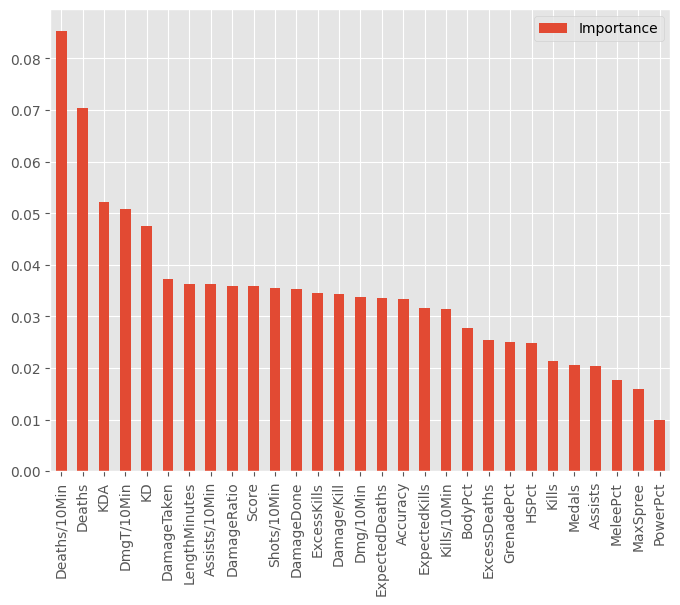

In [205]:
feat_importances = pd.DataFrame(rf_cv.best_estimator_.feature_importances_[:30], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Gradient Boosted Trees

In [206]:
# Gradient Boosted Trees
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gbrt = {'n_estimators': [100,300,500],'learning_rate': [0.01,0.1],'max_depth': [2,4,6], 'subsample': [0.5,0.6,0.8,1]}
GBRT = GridSearchCV(estimator=GradientBoostingClassifier(random_state=69),
                    cv=5, param_grid=param_grid_gbrt,n_jobs=-1)
GBRT.fit(X_train_preprocessed, y_train)

print(GBRT.best_estimator_)
print(f'Gradient Boosed Trees Accuracy: {GBRT.score(X_test_preprocessed, y_test)}')
GBRT.cv_results_
paramResults(GBRT)

GradientBoostingClassifier(max_depth=6, random_state=69, subsample=0.8)
Gradient Boosed Trees Accuracy: 0.6481481481481481
    learning_rate_param  max_depth_param  n_estimators_param  subsample_param  \
0                  0.01                2                 100              0.5   
1                  0.01                2                 100              0.6   
2                  0.01                2                 100              0.8   
3                  0.01                2                 100              1.0   
4                  0.01                2                 300              0.5   
..                  ...              ...                 ...              ...   
67                 0.10                6                 300              1.0   
68                 0.10                6                 500              0.5   
69                 0.10                6                 500              0.6   
70                 0.10                6                 500       

''

In [207]:
ResultsOut(GBRT)

Acc: 0.648
MAE: 0.35
MSE: 0.35
RMSE: 0.59
R^2 Score: -0.42
OOS R^2 Score: -0.42
Log Loss: 12.68
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.58      0.60        50
           1       0.66      0.71      0.68        58

    accuracy                           0.65       108
   macro avg       0.65      0.64      0.64       108
weighted avg       0.65      0.65      0.65       108

---------------------------------------------------------


''

<AxesSubplot: >

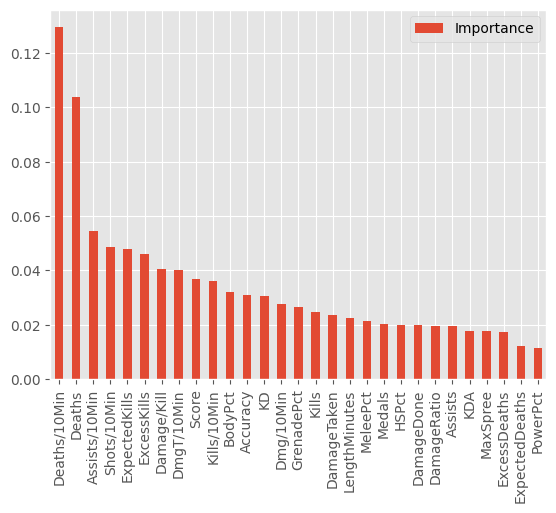

In [208]:
feat_importances = pd.DataFrame(GBRT.best_estimator_.feature_importances_[:30], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')

## XGBoost

In [209]:
from xgboost import XGBClassifier

param_grid_xgb = {'n_estimators': [400,450,475,500],'learning_rate': [0.001,0.01,0.1,0.25],'max_depth': [1,2,3,4,5]}
XGB = GridSearchCV(estimator=XGBClassifier(random_state=69), cv=5, param_grid=param_grid_xgb,n_jobs=-1)
XGB.fit(X_train_preprocessed, y_train)

print(XGB.best_estimator_)
print(f'XGBoost Accuracy: {XGB.score(X_test_preprocessed, y_test)}')
paramResults(XGB)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=69, ...)
XGBoost Accuracy: 0.6666666666666666
    learning_rate_param  max_depth_param  n_estimators_param  Accuracy
0                 0.001                1                 400  0.643571
1                 0.001                1                 450  0.643571
2  

''

In [210]:
ResultsOut(XGB)

Acc: 0.667
MAE: 0.33
MSE: 0.33
RMSE: 0.58
R^2 Score: -0.34
OOS R^2 Score: -0.34
Log Loss: 12.01
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.60      0.63        50
           1       0.68      0.72      0.70        58

    accuracy                           0.67       108
   macro avg       0.66      0.66      0.66       108
weighted avg       0.67      0.67      0.67       108

---------------------------------------------------------


''

<AxesSubplot: >

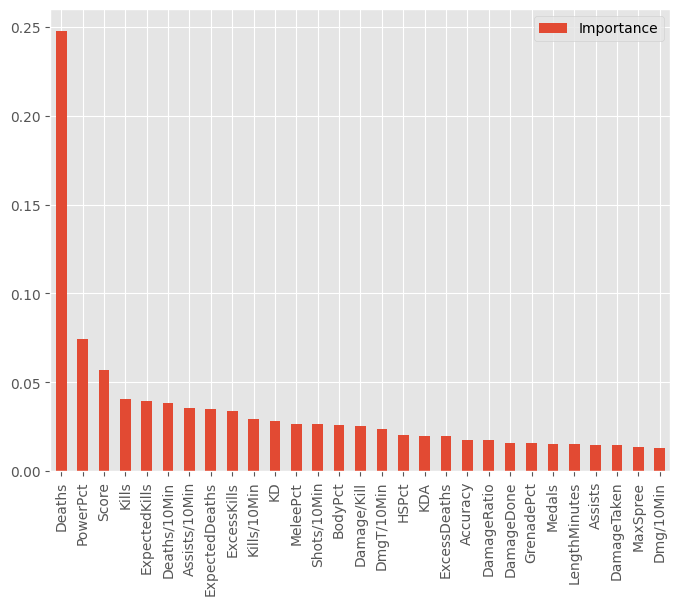

In [211]:
feat_importances = pd.DataFrame(XGB.best_estimator_.feature_importances_[:32], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Neural Net

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=61), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})
Neural Net Accuracy: 0.8055555555555556


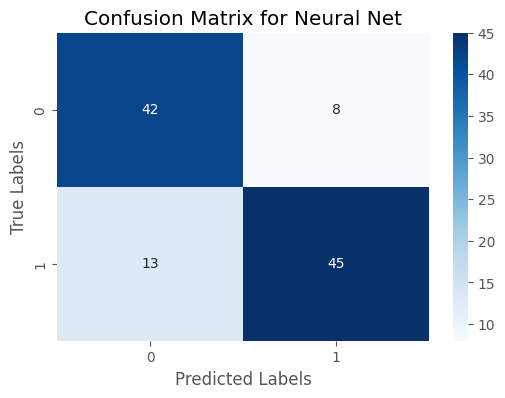

The confusion matrix shows the true positive, false negative, false positive, and true negative values, helping to evaluate the performance of a classification model.


<AxesSubplot: >

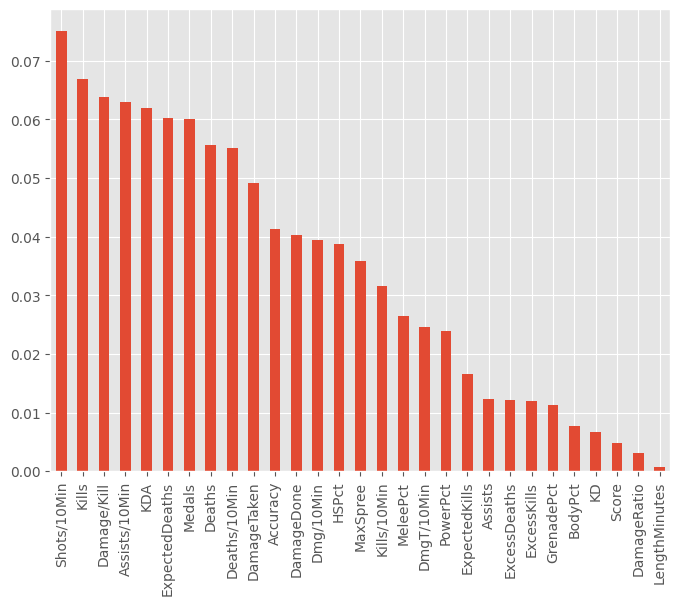

In [212]:
from sklearn.neural_network import MLPClassifier

param_grid_nn = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                'learning_rate': ['constant', 'invscaling', 'adaptive'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
nn = GridSearchCV(estimator=MLPClassifier(random_state=61), cv=5, param_grid=param_grid_nn, n_jobs=-1)

nn.fit(X_train_preprocessed, y_train)
print(nn)
print(f'Neural Net Accuracy: {nn.score(X_test_preprocessed, y_test)}')
from sklearn.metrics import confusion_matrix


# Generate confusion matrix for the Neural Net
conf_matrix = confusion_matrix(y_test, nn.predict(X_test_preprocessed))
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Net')
plt.show()

print("The confusion matrix shows the true positive, false negative, false positive, and true negative values, helping to evaluate the performance of a classification model.")
feat_importances_nn = pd.DataFrame(nn.best_estimator_.coefs_[0].flatten()[:29], index=X_train.columns, columns=["Importance"])
feat_importances_nn = feat_importances_nn.abs().sum(axis=1)
feat_importances_nn = feat_importances_nn / feat_importances_nn.sum()
feat_importances_nn = feat_importances_nn.sort_values(ascending=False)[:29]
feat_importances_nn.plot(kind='bar', figsize=(8,6))


,Model,ACC,MAE,MSE,RMSE,R2,OOS R2,Log Loss
0,Ridge,0.815,0.185,0.185,0.430,0.255,0.255,6.675
1,Lasso,0.815,0.185,0.185,0.430,0.255,0.255,6.675
2,ElasticNet,0.815,0.185,0.185,0.430,0.255,0.255,6.675
3,NeuralNet,0.806,0.194,0.194,0.441,0.218,0.218,7.008
4,Logistic Regression,0.796,0.204,0.204,0.451,0.181,0.181,7.342
5,Random Forest,0.750,0.250,0.250,0.500,-0.006,-0.005,9.011
6,XGBoost,0.667,0.333,0.333,0.577,-0.341,-0.341,12.015
7,Gradient Boosted Trees,0.648,0.352,0.352,0.593,-0.415,-0.415,12.682
8,K-Nearest Neighbors,0.639,0.361,0.361,0.601,-0.452,-0.452,13.016


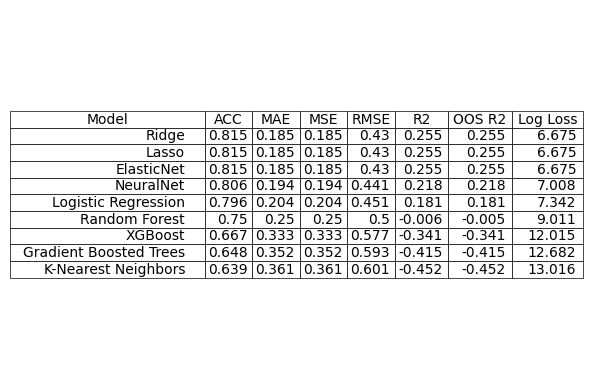

In [213]:
modelss = [logreg,ridge_cv,lasso_cv,elastic_cv,knn_cv,rf_cv,GBRT,XGB,nn]
model_namess = ['Logistic Regression', 'Ridge', 'Lasso', 'ElasticNet',
              'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosted Trees', 'XGBoost', 'NeuralNet']
def saveResults(models, model_names):
    # Initialize an empty dataframe to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'ACC' ,'MAE', 'MSE', 'RMSE', 'R2', 'OOS R2', 'Log Loss'])
    
    # Loop through each model and calculate the metrics
    for i, model in enumerate(models):
        # Generate predictions on the test set
        y_pred = model.predict(X_test_preprocessed)
        
        # Calculate regression metrics
        acc = round(model.score(X_test_preprocessed, y_test),3)
        mae = round(mean_absolute_error(y_test, y_pred),3)
        mse = round(mean_squared_error(y_test, y_pred),3)
        rmse = round(mean_squared_error(y_test, y_pred, squared=False),3)
        r2 = round(r2_score(y_test, y_pred),3)
        oosr2 = round(1-mean_squared_error(y_test,y_pred)/MSE_Histmean,3)
        ll = round(log_loss(y_test,y_pred),3)
        
        # Add metrics to the dataframe
        metrics_df.loc[i] = [model_names[i],acc, mae, mse, rmse, r2, oosr2, ll]
    
    metrics_df = metrics_df.sort_values('ACC', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots()
    table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns,
                     cellLoc='right', loc='center')
    table.auto_set_font_size(True)
    table.auto_set_column_width(col=list(range(len(metrics_df.columns))))
    ax.axis('off')
    plt.savefig('ModelResults0210.png', dpi=300, bbox_inches='tight')
    
    return metrics_df

saveResults(modelss,model_namess)


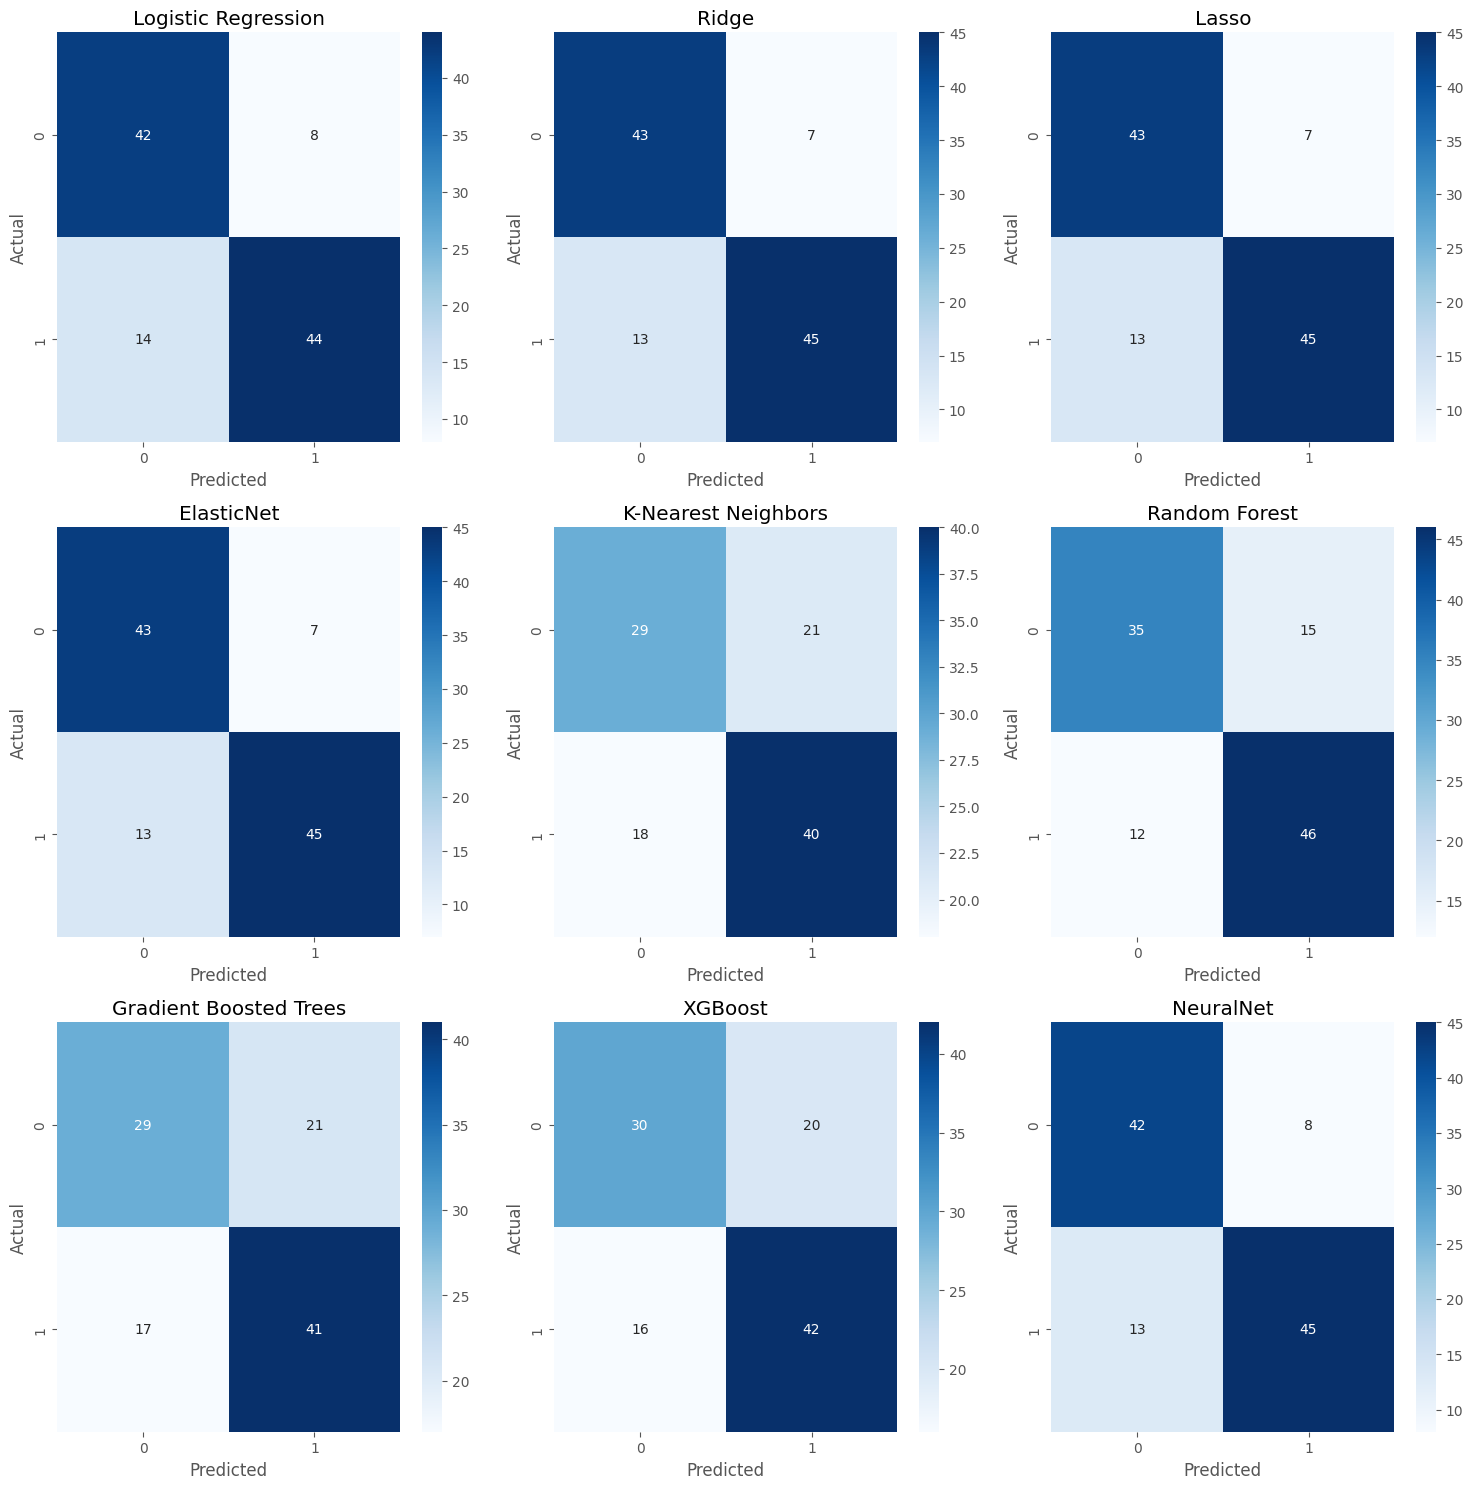

In [217]:
# Assuming X_test_preprocessed and y_test are your test data
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, (model, model_name) in enumerate(zip(modelss, model_namess)):
    y_pred = model.predict(X_test_preprocessed)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(model_name)
    axs[i//3, i%3].set_xlabel('Predicted')
    axs[i//3, i%3].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('Plots/ConfusionMatrixMultigraph.png', dpi=300, bbox_inches='tight')
plt.show()

In [215]:
print(f'Runtime: {round(time.perf_counter() - start,2)}s')

Runtime: 83.08s


In [216]:
X_trainp_df = pd.DataFrame(X_train_preprocessed, columns=X_train.columns)
round(X_trainp_df.describe().transpose(),3).sort_values(by='max',ascending=False)

,count,mean,std,min,25%,50%,75%,max
KD,432.0,0.0,1.001,-1.313,-0.546,-0.195,0.234,11.333
DamageRatio,432.0,-0.0,1.001,-1.735,-0.653,-0.113,0.432,10.240
Damage/Kill,432.0,-0.0,1.001,-1.963,-0.654,-0.212,0.439,6.989
Shots/10Min,432.0,-0.0,1.001,-3.587,-0.592,-0.002,0.598,6.282
Accuracy,432.0,0.0,1.001,-2.958,-0.667,-0.016,0.585,5.861
PowerPct,432.0,-0.0,1.001,-0.374,-0.374,-0.374,-0.374,5.764
Medals,432.0,-0.0,1.001,-1.743,-0.662,-0.122,0.418,4.471
DamageDone,432.0,0.0,1.001,-2.537,-0.749,-0.133,0.662,4.147
Assists,432.0,0.0,1.001,-1.865,-0.586,-0.075,0.437,4.017
GrenadePct,432.0,-0.0,1.001,-0.861,-0.861,-0.160,0.579,3.896
